In [1]:
import nltk

In [2]:
# Download packages
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\mdpan\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mdpan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# Download extra packages
%pip install textblob
%pip install svgling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Check downloaded datasets
from nltk.corpus import gutenberg
files = gutenberg.fileids()
print(files)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [5]:
# I'll use shakespeare macbeth dataset
files[-2]

'shakespeare-macbeth.txt'

In [6]:
# Load sentences
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [7]:
# let's look a little deeper
print(macbeth_sentences[474])

['One', 'cry', "'", 'd', 'God', 'blesse', 'vs', ',', 'and', 'Amen', 'the', 'other', ',', 'As', 'they', 'had', 'seene', 'me', 'with', 'these', 'Hangmans', 'hands', ':', 'Listning', 'their', 'feare', ',', 'I', 'could', 'not', 'say', 'Amen', ',', 'When', 'they', 'did', 'say', 'God', 'blesse', 'vs']


In [8]:
# Sentences quantity
print("Количество предложений: {0}".format(len(macbeth_sentences)))

Количество предложений: 1907


In [9]:
# No need to tokenize sents or words, couse it's already tokenized
# from nltk.tokenize import sent_tokenize, word_tokenize
# Just skip this cell

In [10]:
# Flat array and get all words in one array
print("Массив до: {0}".format(macbeth_sentences[:2]))
words = [item for sublist in macbeth_sentences for item in sublist]
print("Массив после: {0}".format(words[:11]))

Массив до: [['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.']]
Массив после: ['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']', 'Actus']


In [11]:
# Remove stopwords
from nltk.corpus import stopwords

stopwords = stopwords.words("english")
punctuation = ['.', ',', ':', '-', '(', ')', "'", ';', '?', '[', ']', '!', '&', '1', '2', '3']

tokens = [token for token in words if token not in stopwords and token not in punctuation]
tokens[:10]

['The',
 'Tragedie',
 'Macbeth',
 'William',
 'Shakespeare',
 '1603',
 'Actus',
 'Primus',
 'Scoena',
 'Prima']

In [12]:
# Total words
total_words = len(tokens)

print("Количество слов: {0}".format(total_words))
print("Словарь: {0}".format(sorted(set(tokens))[:10]))

Количество слов: 11971
Словарь: ['1603', 'A', 'Accents', 'According', 'Accounted', 'Accursed', 'Acheron', 'Acquaint', 'Act', 'Acting']


In [13]:
# Unique words
from nltk import FreqDist
fdist = FreqDist(tokens)

unique_words = len(fdist)

print("Уникальных слов: {0}".format(unique_words))

Уникальных слов: 3895


In [14]:
# lexical diversity
print("Параметр лексического разнообразия текста: {0}".format(unique_words / total_words))

Параметр лексического разнообразия текста: 0.3253696433046529


**Длина текста, словарь текста, число различных слов в словаре, рассчитать параметр лексического разнообразия текста.**
> Длина текста = 11971

> Число уникальных слов 3895

> Параметр лексического разнообразия текста = 0.325


In [15]:
# Format tokens to the text type
from nltk import Text

text_tokens = Text(tokens)
type(text_tokens)

nltk.text.Text

In [16]:
# The most common words
fdist.most_common(10)

[('I', 333),
 ('And', 170),
 ('Macb', 137),
 ('The', 118),
 ('haue', 117),
 ('Enter', 80),
 ('That', 80),
 ('What', 74),
 ('To', 73),
 ('thou', 63)]

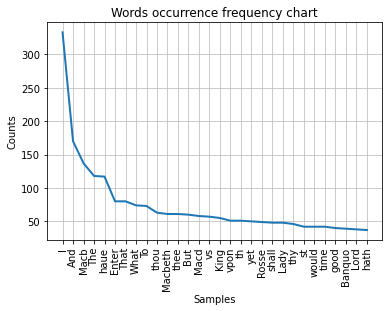

<AxesSubplot:title={'center':'Words occurrence frequency chart'}, xlabel='Samples', ylabel='Counts'>

In [17]:
display(fdist.plot(30, cumulative=False, title="Words occurrence frequency chart"))

In [18]:
# Length of words
token_len = [len(token) for token in tokens]
token_len[:20]

[3, 8, 7, 7, 11, 4, 5, 6, 6, 5, 7, 9, 5, 5, 7, 4, 5, 5, 4, 6]

<AxesSubplot:ylabel='Density'>

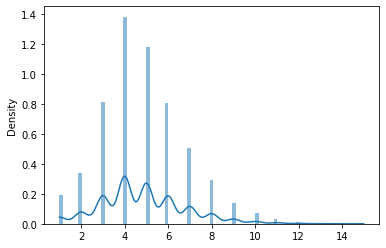

In [19]:
# Frequency of average word length
import seaborn
seaborn.histplot(token_len, kde=True, stat="density", linewidth=0)

In [20]:
# Research of the thematic structure of the text
them_words = {i:((fdist[i]+len(i))/2) for i in fdist.keys()}

for i in range(10):
    key = list(them_words.keys())[i]
    print("%s -> %s" % (key, them_words[key]))

The -> 60.5
Tragedie -> 4.5
Macbeth -> 34.0
William -> 4.0
Shakespeare -> 6.0
1603 -> 2.5
Actus -> 5.0
Primus -> 3.5
Scoena -> 3.5
Prima -> 5.0


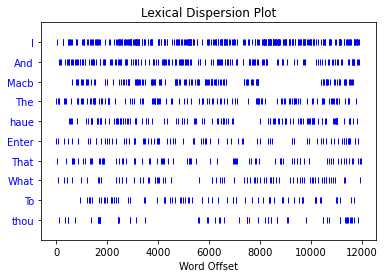

In [21]:
# Lexical Dispersion Plot
from nltk.draw.dispersion import dispersion_plot

them_words_mc = [i[0] for i in fdist.most_common()]
dispersion_plot(tokens, them_words_mc[:10])

In [22]:
# Bigrams
from nltk import bigrams

bigram_them_words_list = list(bigrams(them_words_mc[:10]))
bigram_all_words = list(bigrams(tokens))

bigram_them_words = []
for i in bigram_them_words_list:
  bigram_them_words += [(i[0], i[1])]
  bigram_them_words += [(i[1], i[0])]

freq_bigram = {}
for i in bigram_all_words:
  if i in bigram_them_words:
    if freq_bigram.get(i) == None:
      freq_bigram[i] = 1
    else:
      freq_bigram[i] += 1

for i in freq_bigram:
  freq_bigram[i] = round((freq_bigram[i] / len(bigram_them_words) / 2), 3)

print("Биграммы: {0}".format(freq_bigram))

Биграммы: {('And', 'I'): 0.194, ('Macb', 'And'): 0.028, ('Macb', 'The'): 0.167, ('I', 'And'): 0.028, ('What', 'That'): 0.028}


In [23]:
# Syntactic analysis
from textblob import TextBlob
from nltk import CFG, RegexpParser

In [24]:
# Part of POS tagging
text = set(tokens)
text = ' '.join([token for token in text])

sent = nltk.sent_tokenize(text)[0][:-1]
blob = TextBlob(sent)
print("Слова с тегами частью речи: {0}".format(blob.tags[:4]))

Слова с тегами частью речи: [('expence', 'NN'), ('distresses', 'VBZ'), ('manly', 'RB'), ('mile', 'JJ')]


In [25]:
# POS (part-of-speech) tagging
pos_tags = {} 
for i in blob.tags:
  if pos_tags.get(i[1]) == None:
    pos_tags[i[1]] = [i[0]]
  else:
    pos_tags[i[1]] += [i[0]]

# print("Словарь со всеми словами и тегами текста: {0}".format(pos_tags))

In [26]:
# POS tags
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
print("Теги частей речи: {0}".format(list(pos_tags.keys())))

Теги частей речи: ['NN', 'VBZ', 'RB', 'JJ', 'NNP', 'VBD', 'NNPS', 'VBP', 'NNS', 'JJS', 'JJR', 'VBG', 'MD', 'VB', 'POS', 'IN', 'VBN', 'RP', 'FW', 'PRP', 'DT', 'PRP$', 'CC', 'WRB', 'RBR', 'CD', 'WDT', 'TO', 'EX', 'WP$', 'WP']


Личные местоимения: ['You', 'self', 'I', 'They', 'It', 'She', 'We', 'murther', 'He']
Новый стоплист: [']', '!', '&', '1', '2', '3', 'You', 'self', 'I', 'They', 'It', 'She', 'We', 'murther', 'He']
Новые токены: ['The', 'Tragedie', 'Macbeth', 'William', 'Shakespeare', '1603', 'Actus', 'Primus', 'Scoena', 'Prima']
Уникальных слов после чистки: 3886    До чистки: 3895    Разница: 9


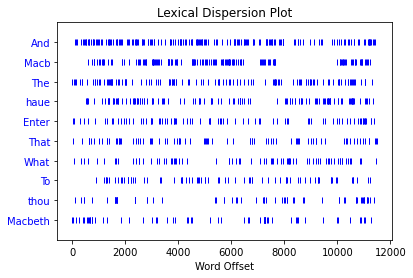

None

Биграммы: {('Macb', 'And'): 0.056, ('Macb', 'The'): 0.167, ('What', 'That'): 0.028, ('thou', 'Macbeth'): 0.028}


In [43]:
# Remove PRP and check bigrams
print("Личные местоимения: {0}".format(pos_tags['PRP']))

new_stop_words = stopwords + punctuation + pos_tags['PRP']
print("Новый стоплист: {0}".format(new_stop_words[-15:]))

new_tokens = [token for token in words if token not in new_stop_words]
print("Новые токены: {0}".format(new_tokens[:10]))

new_fdist = FreqDist(new_tokens)
print("Уникальных слов после чистки: {0}    До чистки: {1}    Разница: {2}"
      .format(len(new_fdist), unique_words, unique_words-len(new_fdist)))

new_them_words_mc = [i[0] for i in new_fdist.most_common()]
display(dispersion_plot(new_tokens, new_them_words_mc[:10]))

new_bigram_them_words_list = list(bigrams(new_them_words_mc[:10]))
new_bigram_all_words = list(bigrams(new_tokens))

new_bigram_them_words = []
for i in new_bigram_them_words_list:
  new_bigram_them_words += [(i[0], i[1])]
  new_bigram_them_words += [(i[1], i[0])]

new_freq_bigram = {}
for i in new_bigram_all_words:
  if i in new_bigram_them_words:
    if new_freq_bigram.get(i) == None:
      new_freq_bigram[i] = 1
    else:
      new_freq_bigram[i] += 1

for i in new_freq_bigram:
  new_freq_bigram[i] = round((new_freq_bigram[i] / len(new_bigram_them_words) / 2), 3)

print("Биграммы: {0}".format(new_freq_bigram))

In [27]:
# Creating a lexical pattern
pattern = """P: {<NN><VBD><JJ>(<CC><JJ>)?}"""

NPChunker = RegexpParser(pattern)
result = NPChunker.parse(blob.tags)

display(result)

Центр дерева
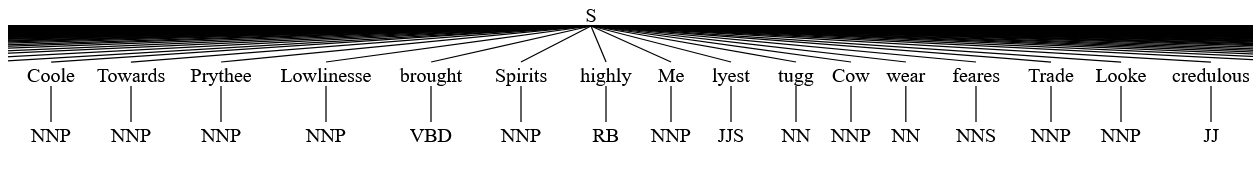